## Bosques Aleatorios (Random Forest): Explicación, Formalismo y Aplicación

El modelo de **bosques aleatorios** es un método de aprendizaje automático ampliamente utilizado en clasificación y regresión. Se basa en el uso de múltiples árboles de decisión y es parte de los algoritmos de **ensembles** o conjuntos, que combinan varios modelos para mejorar la precisión y reducir el sobreajuste.

### 1. Concepto Básico

Un bosque aleatorio es una colección de **árboles de decisión** independientes que, al ser combinados, producen un modelo más robusto y generalizable. Este modelo aprovecha la diversidad de los árboles individuales, reduciendo los errores de predicción y el riesgo de sobreajuste al promediar sus resultados.

### 2. Formalismo Matemático

Para formalizar el modelo de bosque aleatorio, asumimos que se genera un conjunto de árboles de decisión $$ T_1, T_2, \ldots, T_m $$ Cada árbol \( T_i \) se entrena sobre una muestra aleatoria \( S_i \) del conjunto de datos \( S \), con características \( X \) y etiquetas \( y \).

En el caso de **clasificación**, el bosque aleatorio predice la clase \( \hat{y} \) a través de una votación mayoritaria:

$$
\hat{y} = \text{mode}(T_1(X), T_2(X), \ldots, T_m(X))
$$

Para **regresión**, la predicción \( \hat{y} \) es el promedio de las predicciones individuales:

$$
\hat{y} = \frac{1}{m} \sum_{i=1}^{m} T_i(X)
$$

Esta combinación reduce la varianza, haciendo que el bosque aleatorio sea menos sensible al ruido en los datos de entrenamiento, mejorando así la generalización.

### 3. Formalismo Computacional

Desde un punto de vista computacional, el bosque aleatorio se construye siguiendo estos pasos clave:

1. **Muestreo por Bootstrap**: Se genera cada árbol a partir de una muestra aleatoria de los datos, generada con reemplazo (bagging). Este proceso puede ejecutarse en paralelo, ya que los árboles no dependen unos de otros.
  
2. **Selección de Características**: En cada nodo de cada árbol, se evalúa un subconjunto aleatorio de características en lugar de todas, para encontrar la mejor división. Este enfoque ahorra tiempo de cómputo y genera diversidad entre los árboles.
  
3. **Predicción en Paralelo**: La predicción final del bosque se calcula al combinar los resultados de los árboles. Este paso también puede ejecutarse en paralelo, aprovechando los beneficios de la computación distribuida.

Esta estructura permite que los bosques aleatorios sean altamente escalables y eficientes en entornos de grandes volúmenes de datos.

### 4. Construcción de un Bosque Aleatorio

La construcción de un bosque aleatorio implica dos conceptos clave: **bagging** y **selección aleatoria de características**.

- **Bagging (Bootstrap Aggregation)**: Para construir cada árbol, el algoritmo selecciona una muestra aleatoria (con reemplazo) de los datos de entrenamiento. Esta técnica permite que cada árbol trabaje con una versión ligeramente diferente del conjunto de datos original, lo que agrega variabilidad y reduce el riesgo de sobreajuste.
  
- **Selección Aleatoria de Características**: En cada nodo de un árbol, en lugar de considerar todas las características para realizar la división, el modelo elige aleatoriamente un subconjunto de características. Esta técnica aumenta la diversidad entre los árboles, ya que cada árbol se enfoca en diferentes atributos, lo cual es especialmente útil para manejar datos de alta dimensionalidad.

### 5. Algoritmo de los Bosques Aleatorios

1. **Construcción de árboles**: Se construye un conjunto de árboles de decisión (usualmente cientos o miles). Cada árbol es independiente y se entrena con una muestra diferente de los datos.
2. **Promedio de Resultados**: Para una predicción, cada árbol realiza su propia predicción. Luego, en clasificación, se toma una **votación mayoritaria** para decidir la clase final; en regresión, se calcula el **promedio** de todas las predicciones de los árboles.
3. **Reducción de Varianza**: Al combinar los resultados de múltiples árboles, los bosques aleatorios reducen la varianza del modelo (riesgo de que sea demasiado específico para los datos de entrenamiento) sin aumentar el sesgo significativamente.

### 6. Ventajas y Desventajas

**Ventajas**:
- **Precisión**: Los bosques aleatorios suelen ser altamente precisos y consistentes en comparación con los árboles individuales.
- **Reducción de Sobreajuste**: Al combinar varios árboles, se disminuye la tendencia al sobreajuste, ya que los errores individuales se promedian.
- **Robustez**: Los bosques aleatorios funcionan bien en datos de alta dimensionalidad y en situaciones donde existen características irrelevantes o ruido en los datos.

**Desventajas**:
- **Interpretabilidad**: Aunque cada árbol individual puede ser interpretado, el bosque como un conjunto es más complejo de analizar.
- **Coste Computacional**: Entrenar cientos o miles de árboles requiere mayor tiempo de procesamiento y memoria, especialmente en grandes conjuntos de datos.

### 7. Parámetros Clave

- **n_estimators**: Número de árboles en el bosque. Un mayor número suele mejorar la precisión hasta cierto punto, pero aumenta el costo computacional.
- **max_features**: Número máximo de características a considerar en cada nodo. Valores más bajos aumentan la diversidad entre árboles, pero un valor demasiado bajo puede reducir la precisión.
- **max_depth** y **min_samples_split**: Parámetros para controlar la profundidad y el tamaño mínimo de los nodos. Ajustarlos ayuda a controlar el sobreajuste.

### 8. Implementación en Python

Para implementar un bosque aleatorio en Python, podemos usar la clase `RandomForestClassifier` de `scikit-learn`. A continuación se muestra un ejemplo básico:

In [1]:
# Cargar librerías
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar datos
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.4f}")

Precisión del modelo: 1.0000


# Ejemplo de Clasificación con Bosques Aleatorios

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import preprocessing

In [3]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "/content/Social_Network_Ads.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
#Sacar las variables independientes
X = dataset.iloc[:,[2,3]].values

# Sacar la variable dependientes
y = dataset.iloc[:,4].values

In [5]:
X.shape

(400, 2)

In [6]:
#Division de Datos - entrenamiento y validacion

#herramienta para dividir los datos
from sklearn.model_selection import train_test_split

#divide los datos en 20% para la validacion y se colocar una semilla para hacer la division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
from sklearn.ensemble import RandomForestClassifier
#Ajuste del clasificdor con Maquinas de soporte vectorial

clasificador = RandomForestClassifier(n_estimators = 10, criterion="log_loss", random_state=0)
clasificador.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=10, random_state=0)

In [9]:
#Prediccion de los resultados con el conjusto de testing

y_pre = clasificador.predict(X_test)
#respuesta del modelo
print(y_pre)
#Valores dados por los datos de testing
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 1 0 1 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 1]


In [10]:
#Comprobacion del resultado - Matriz de confucion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
cm

array([[73,  6],
       [ 6, 35]])

<ipython-input-11-696c7b72de1a>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


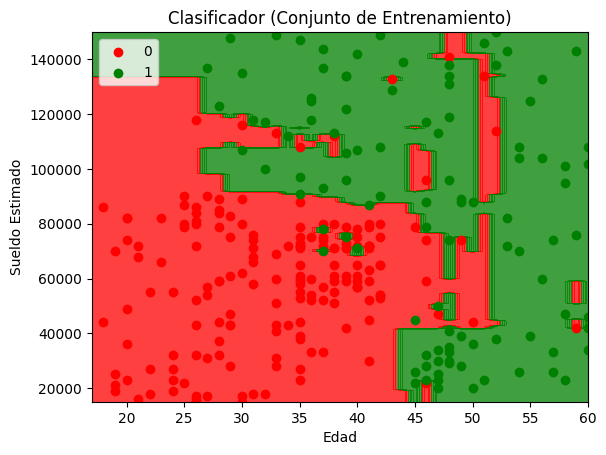

In [11]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
# Frontera:

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 500))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

<ipython-input-12-4b4205efe2ad>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


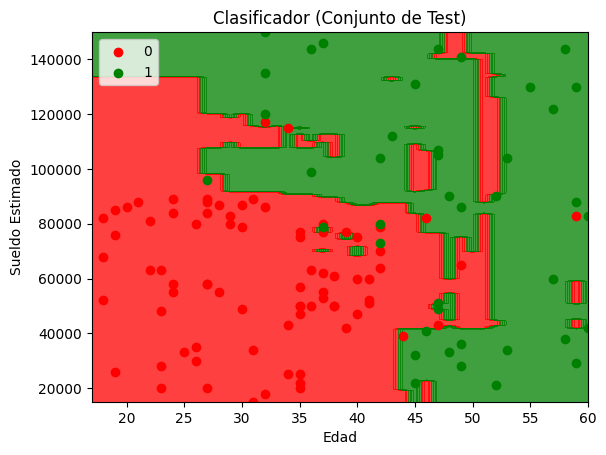

In [12]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 500))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()
